In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
import survivors.datasets as ds

import warnings
warnings.filterwarnings("ignore")

In [6]:
X1, y1, features1, categ1, _ = ds.load_backblaze_2016_2018()
X2, y2, features2, categ2, _ = ds.load_backblaze_2018_2021()
X3, y3, features3, categ3, _ = ds.load_backblaze_2021_2023()

<Axes: xlabel='time', ylabel='Density'>

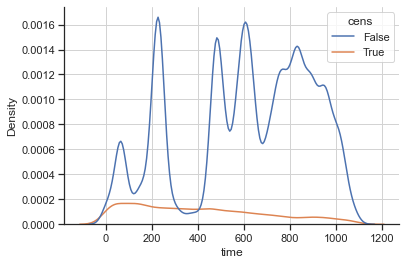

In [29]:
sns.kdeplot(pd.DataFrame(y1), x="time", hue="cens", bw_adjust=0.7)

<Axes: xlabel='time', ylabel='Density'>

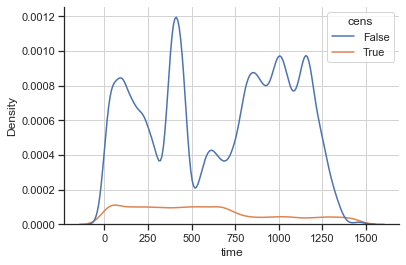

In [30]:
sns.kdeplot(pd.DataFrame(y2), x="time", hue="cens", bw_adjust=0.7)

<Axes: xlabel='time', ylabel='Density'>

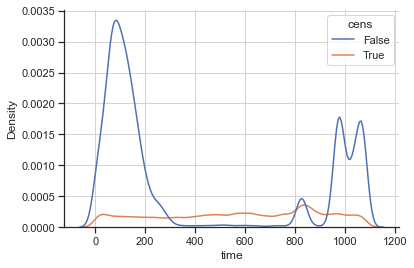

In [33]:
sns.kdeplot(pd.DataFrame(y3), x="time", hue="cens", bw_adjust=0.4)

In [23]:
# from datetime import datetime
# datetime.strptime("2021-12-31", "%Y-%m-%d") - datetime.strptime("2018-01-01", "%Y-%m-%d")

In [47]:
df = X.fillna(0).copy()
df["time"] = y["time"]
df["event"] = y["cens"]


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 37625 total observations, 33392 right-censored observations>
         test_name = proportional_hazard_test

---
                           test_statistic      p  -log2(p)
capacity_bytes       km            192.24 <0.005    142.80
                     rank          359.32 <0.005    263.77
model                km              0.27   0.60      0.73
                     rank            2.98   0.08      3.57
smart_10_normalized  km            131.48 <0.005     98.70
                     rank          273.55 <0.005    201.71
smart_10_raw         km              0.01   0.92      0.12
                     rank            0.01   0.91      0.13
smart_11_normalized  km              0.78   0.38      1.41
                     rank            0.03   0.87      0.20
smart_11_raw         km              1.99   0.16      2.65
                     rank            1.52   0.22      2.20
smart_12_normalized  km            716.67 <0.005    522.04
                     rank          877.66 <0.005    638.31
smart_12_raw         km              1.30   0.25      1.98
                     rank            1.79   0.18      2.47
smart_183_normalized km             93.71 <0.005     71.22
                     rank          207.63 <0.005    153.96
smart_183_raw        km              0.34   0.56      0.83
                     rank            0.97   0.33      1.62
smart_184_normalized km              7.62   0.01      7.44
                     rank            9.90 <0.005      9.24
smart_184_raw        km              2.34   0.13      2.99
                     rank            3.37   0.07      3.92
smart_187_normalized km             22.01 <0.005     18.49
                     rank           35.34 <0.005     28.43
smart_187_raw        km             89.41 <0.005     68.07
                     rank          213.25 <0.005    158.03
smart_188_normalized km             29.57 <0.005     24.14
                     rank           50.87 <0.005     39.88
smart_188_raw        km              0.85   0.36      1.49
                     rank            0.04   0.84      0.25
smart_189_normalized km             12.79 <0.005     11.48
                     rank           15.31 <0.005     13.42
smart_189_raw        km              1.40   0.24      2.08
                     rank            0.95   0.33      1.60
smart_190_normalized km             11.45 <0.005     10.45
                     rank           21.82 <0.005     18.35
smart_190_raw        km             47.75 <0.005     37.58
                     rank           56.11 <0.005     43.73
smart_191_normalized km              0.78   0.38      1.40
                     rank           22.32 <0.005     18.73
smart_191_raw        km             25.32 <0.005     20.97
                     rank           36.72 <0.005     29.45
smart_192_normalized km             39.92 <0.005     31.82
                     rank           56.03 <0.005     43.67
smart_192_raw        km              2.02   0.16      2.68
                     rank            7.24   0.01      7.13
smart_193_normalized km            135.68 <0.005    101.75
                     rank          221.09 <0.005    163.71
smart_193_raw        km              1.97   0.16      2.64
                     rank            0.80   0.37      1.44
smart_194_normalized km              0.01   0.92      0.12
                     rank            0.56   0.45      1.14
smart_194_raw        km             71.86 <0.005     55.26
                     rank           81.04 <0.005     61.97
smart_195_normalized km            181.45 <0.005    134.98
                     rank          406.92 <0.005    298.20
smart_195_raw        km             52.73 <0.005     41.25
                     rank          152.53 <0.005    113.99
smart_196_normalized km             12.10 <0.005     10.96
                     rank           24.59 <0.005     20.43
sm



1. Variable 'capacity_bytes' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'capacity_bytes' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'capacity_bytes' using pd.cut, and then specify it in
`strata=['capacity_bytes', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'smart_10_normalized' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_10_normalized' might be incorrect. That is,
there may be non-linear terms miss


13. Variable 'smart_191_raw' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_191_raw' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'smart_191_raw' using pd.cut, and then specify it in
`strata=['smart_191_raw', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


14. Variable 'smart_192_normalized' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_192_normalized' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitiv


25. Variable 'smart_198_raw' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_198_raw' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'smart_198_raw' using pd.cut, and then specify it in
`strata=['smart_198_raw', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


26. Variable 'smart_199_normalized' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 3), you can include `strata=['smart_199_normalized',
...]` in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lin


38. Variable 'smart_3_raw' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_3_raw' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'smart_3_raw' using pd.cut, and then specify it in
`strata=['smart_3_raw', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


39. Variable 'smart_4_normalized' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'smart_4_normalized' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorre

[[<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0842)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6034)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9121)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9173)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8724)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3775)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2178)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1589)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1807)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2539)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed tim

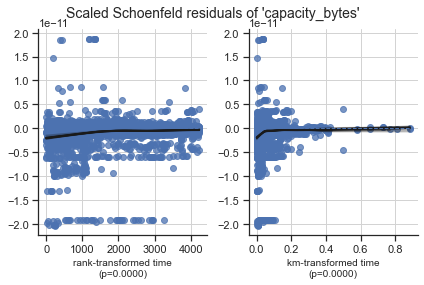

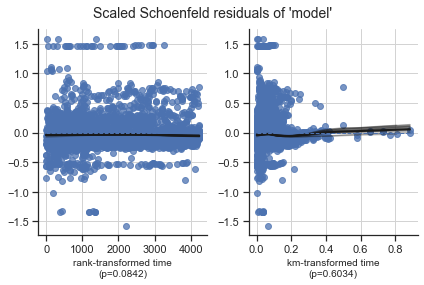

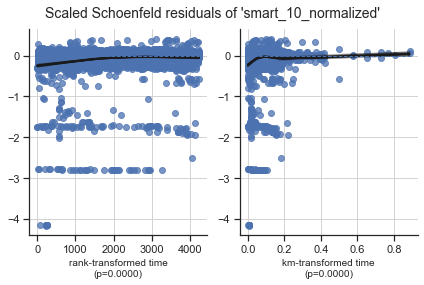

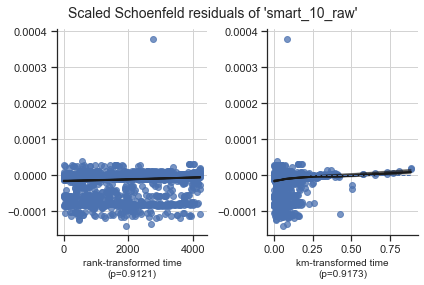

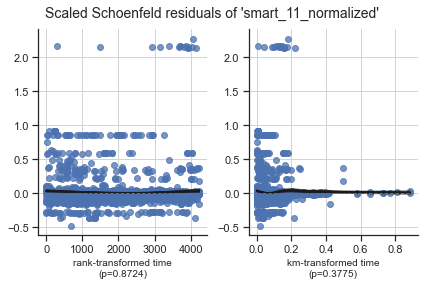

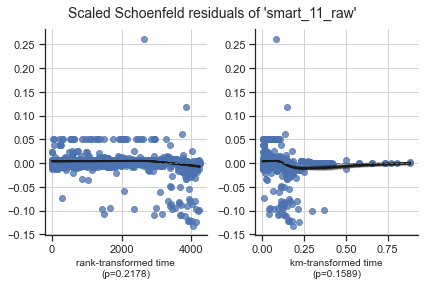

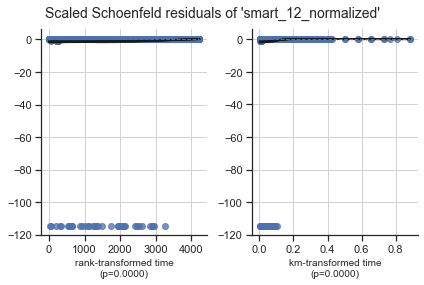

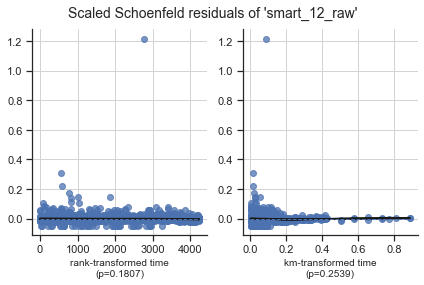

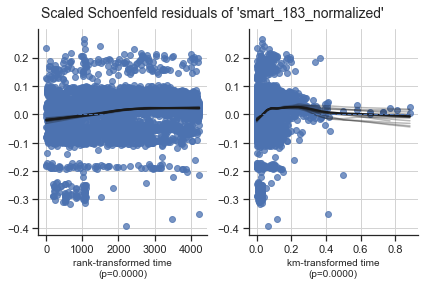

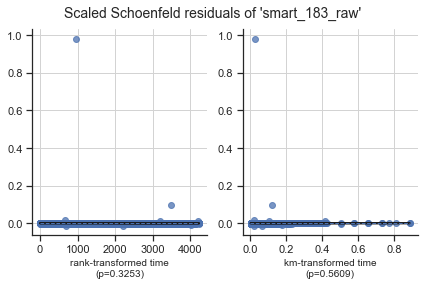

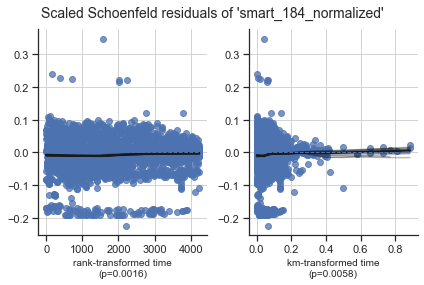

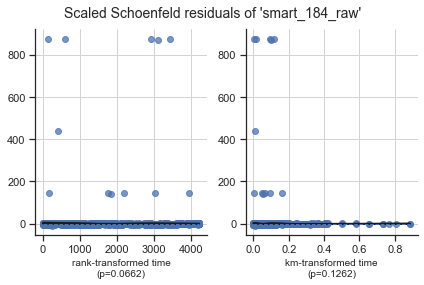

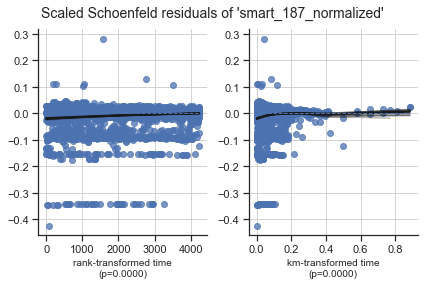

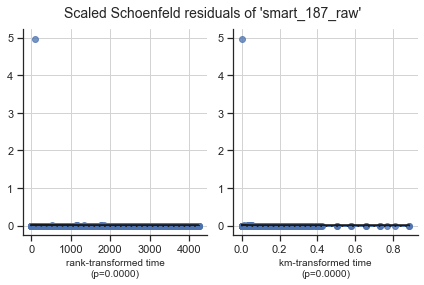

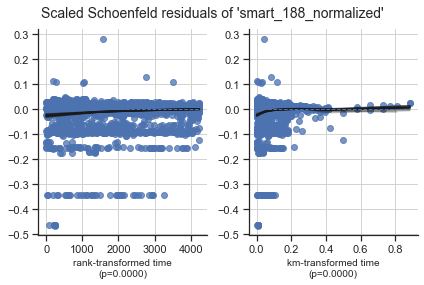

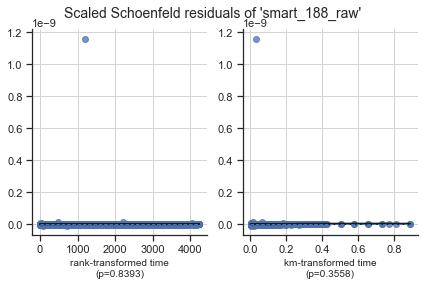

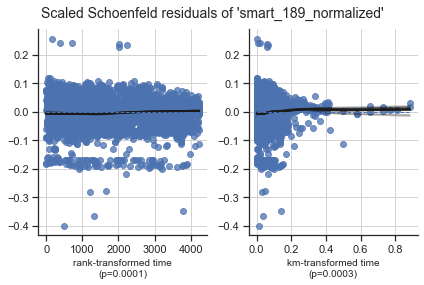

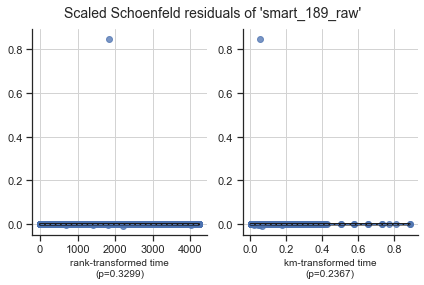

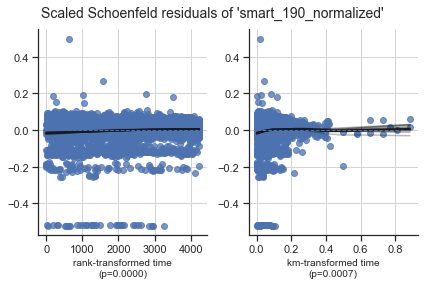

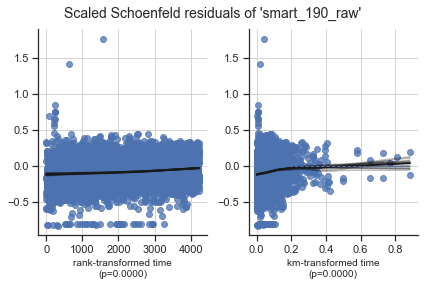

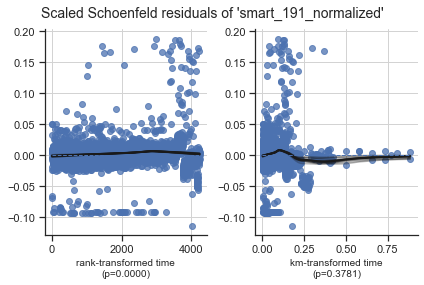

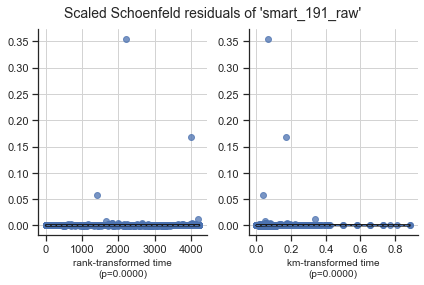

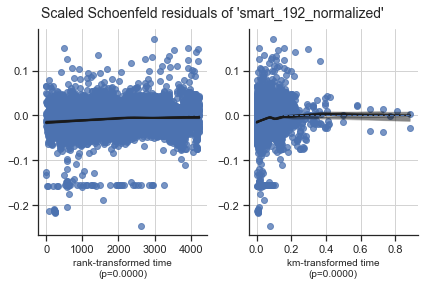

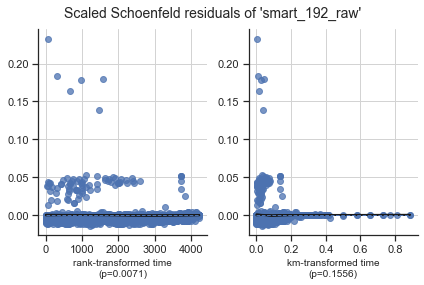

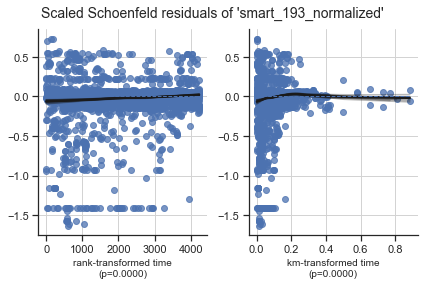

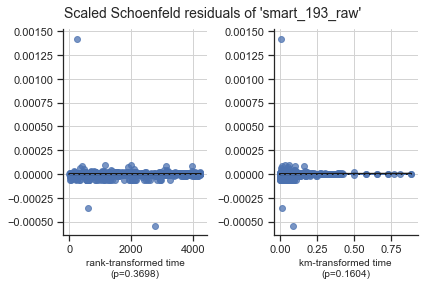

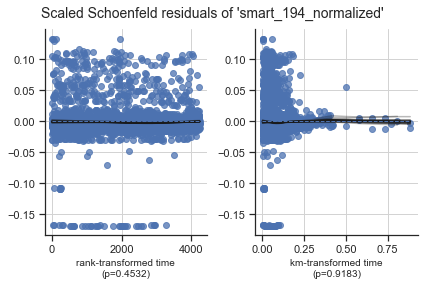

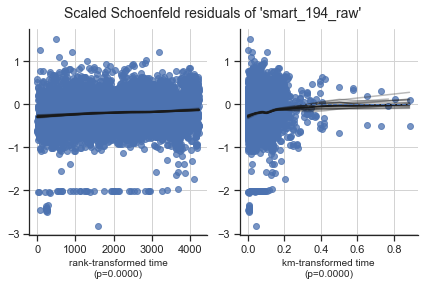

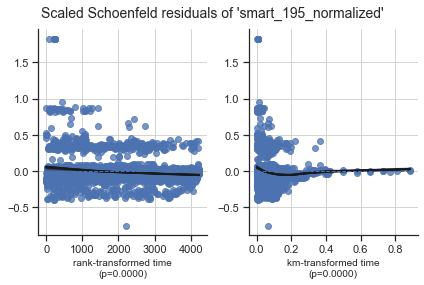

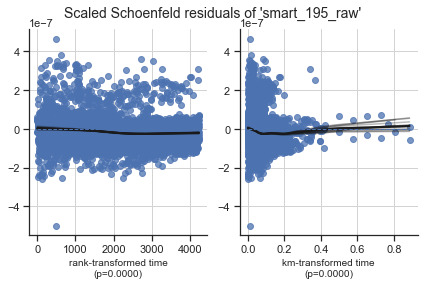

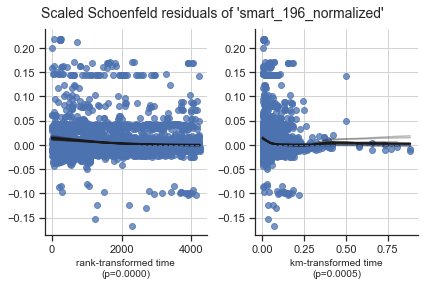

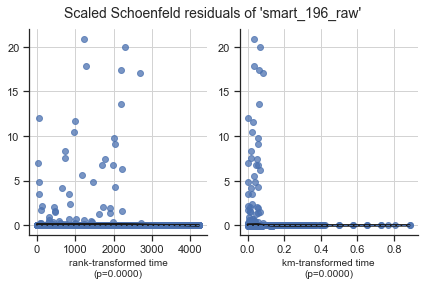

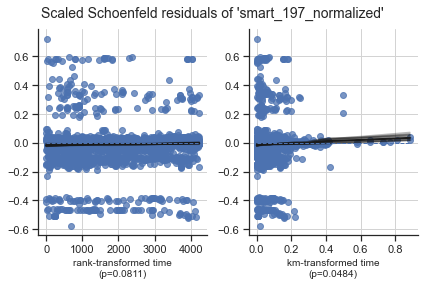

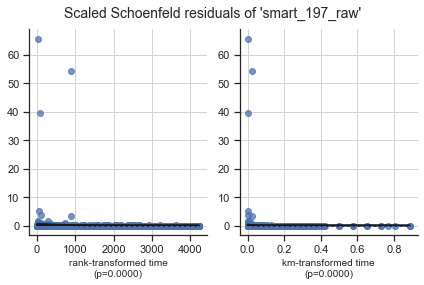

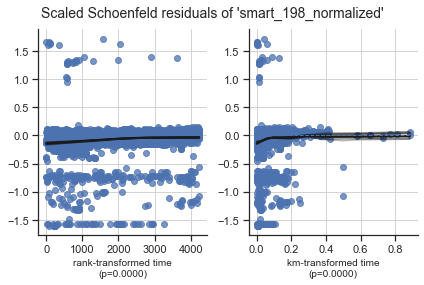

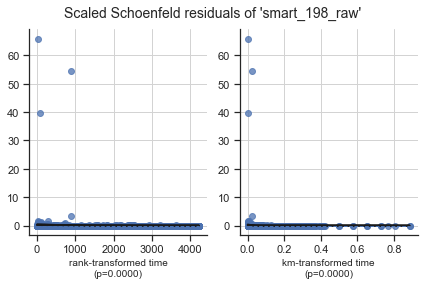

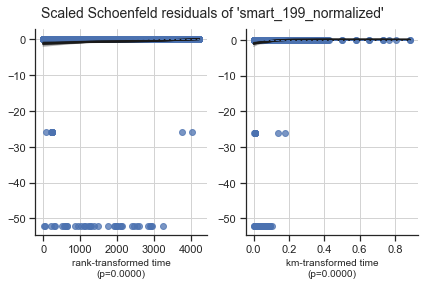

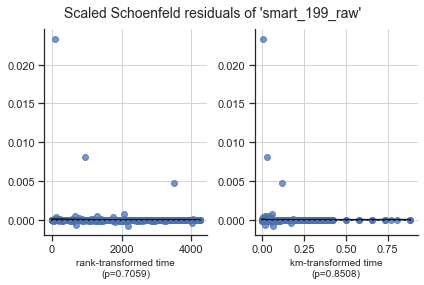

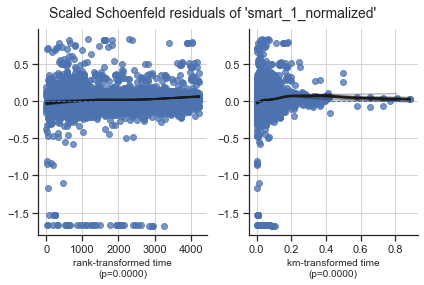

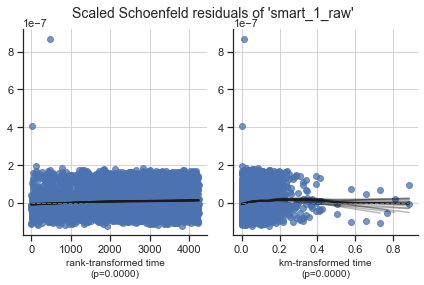

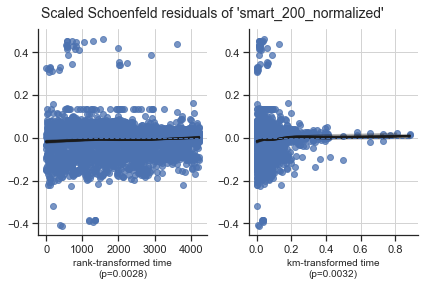

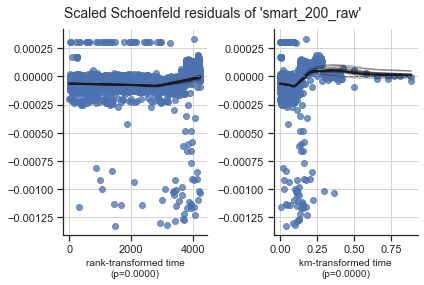

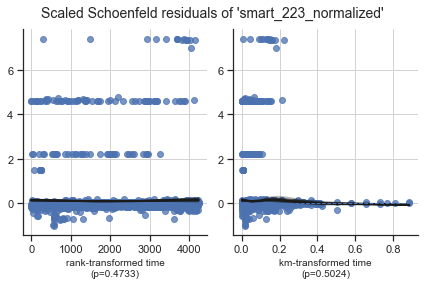

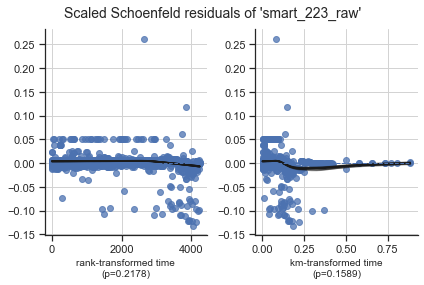

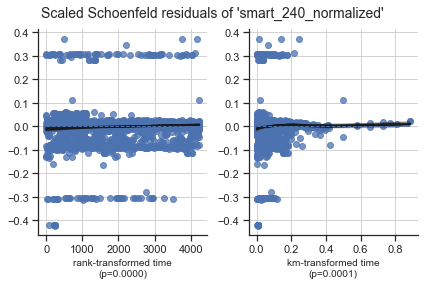

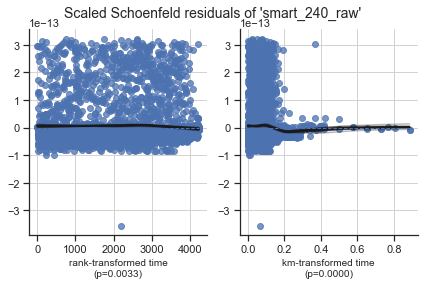

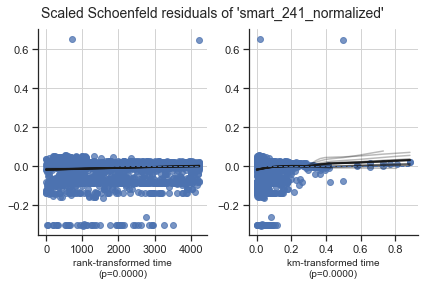

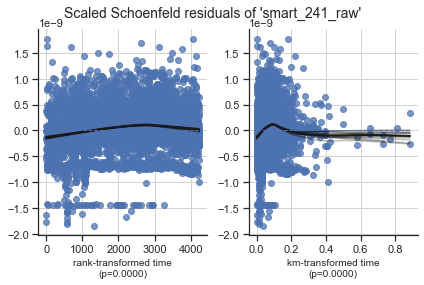

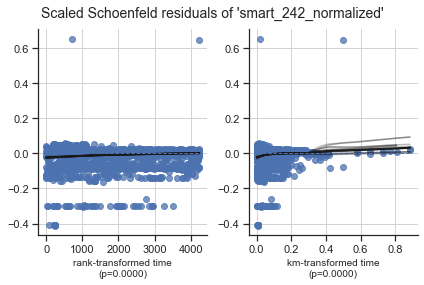

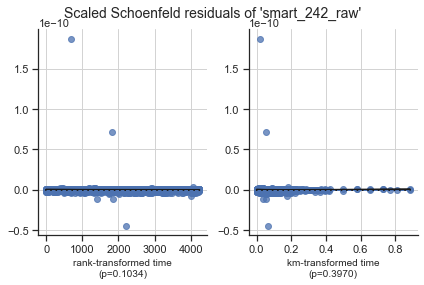

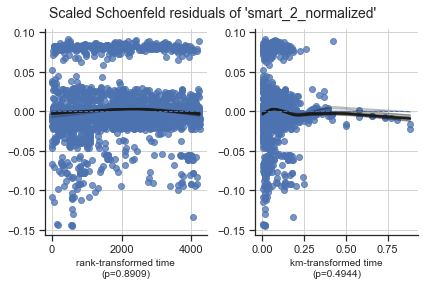

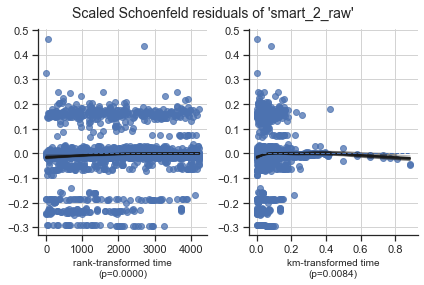

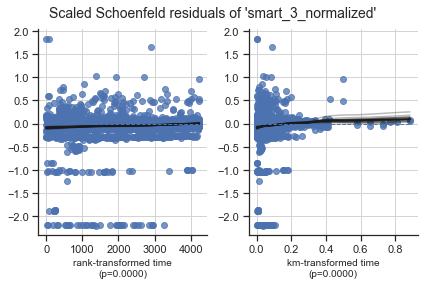

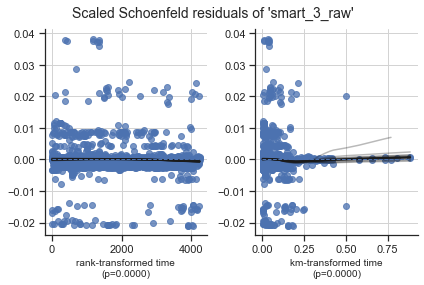

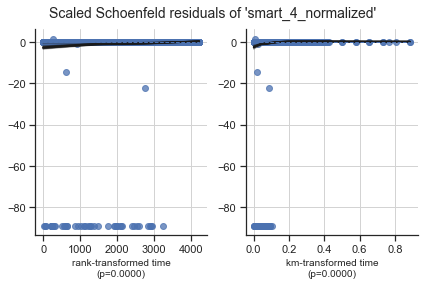

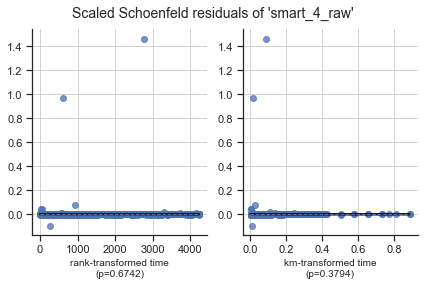

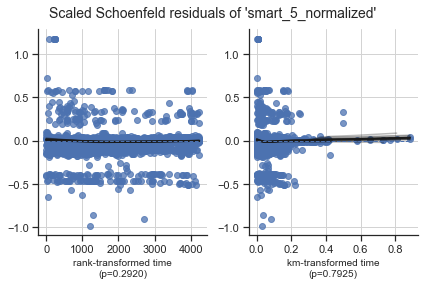

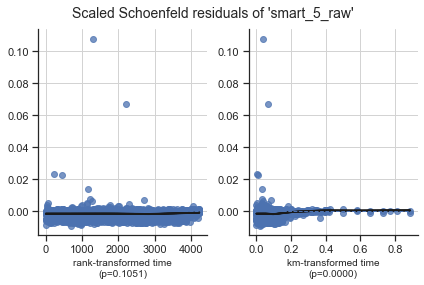

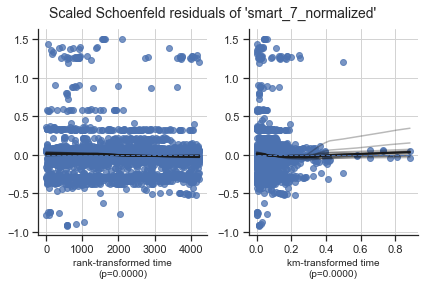

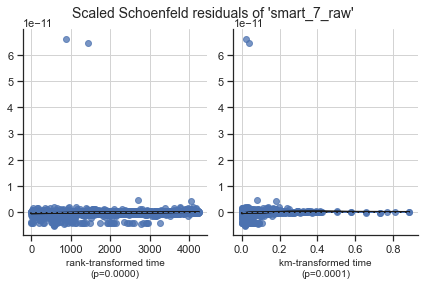

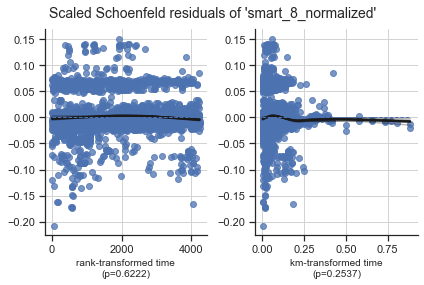

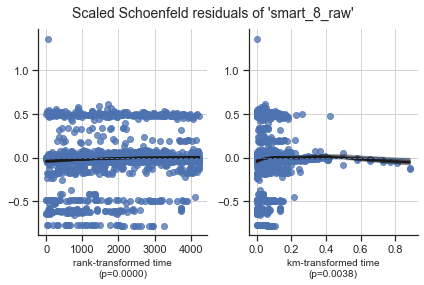

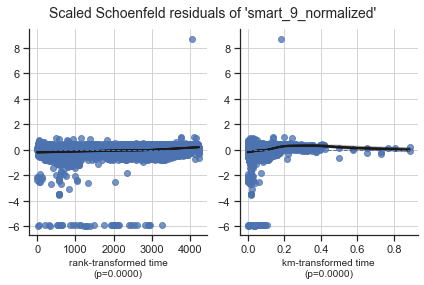

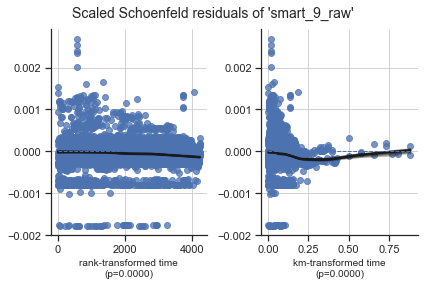

In [120]:
import lifelines

#Fitting the model
model = lifelines.CoxPHFitter(penalizer=0.01).fit(df, duration_col='time', event_col='event')
#Assumption check
model.check_assumptions(df, p_value_threshold=0.05, show_plots=True)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines.datasets import load_gbsg2
from lifelines import CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from lifelines.statistics import proportional_hazard_test, logrank_test

In [123]:
from lifelines import KaplanMeierFitter

def check_assumption(df):
    kmf = KaplanMeierFitter()
    kmf.fit(df['time'], event_observed=df['event'])

    typical_case = df.drop(columns=['time', 'event']).median().to_frame().T
    timeline = np.linspace(1, df['time'].max(), 500)

    # plt.figure(figsize=(7, 5))
    # kmf.plot_survival_function(label='Kaplan-Meier (эмпирическая)', ci_show=True)
    # for M in [WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter]:
    #     model = M(penalizer=0.001)
    #     model.fit(df, duration_col='time', event_col='event')
    #     surv = model.predict_survival_function(typical_case, times=timeline)
    #     plt.plot(timeline, surv.T.values[0], label=f'{model.__class__.__name__}', linestyle='--')

    # plt.title("Сравнение функций выживания")
    # plt.xlabel("Время")
    # plt.ylabel("S(t)")
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()
    
    quantiles = np.linspace(0.3, 0.99, 100)
    kmf_qs = [kmf.percentile(q) for q in quantiles]
    
    fig = plt.figure(figsize=(6, 4))
    for M in [WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter]:
        model = M(penalizer=0.01)
        model.fit(df, duration_col='time', event_col='event')
        models_qs = [model.predict_percentile(typical_case, p=q).iloc[0] for q in quantiles]
        plt.plot(kmf_qs, models_qs, label=f'{model.__class__.__name__[:-6]}', linestyle='--', linewidth=3)

    plt.plot(kmf_qs, kmf_qs, color="red", label="Best similarity", linewidth=3)
    fig.set_dpi(300)
    plt.ylim(0, 3000)
    plt.xlabel("Quantiles of the theoretical time distribution")
    plt.ylabel("Quantiles of the empirical time distribution")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

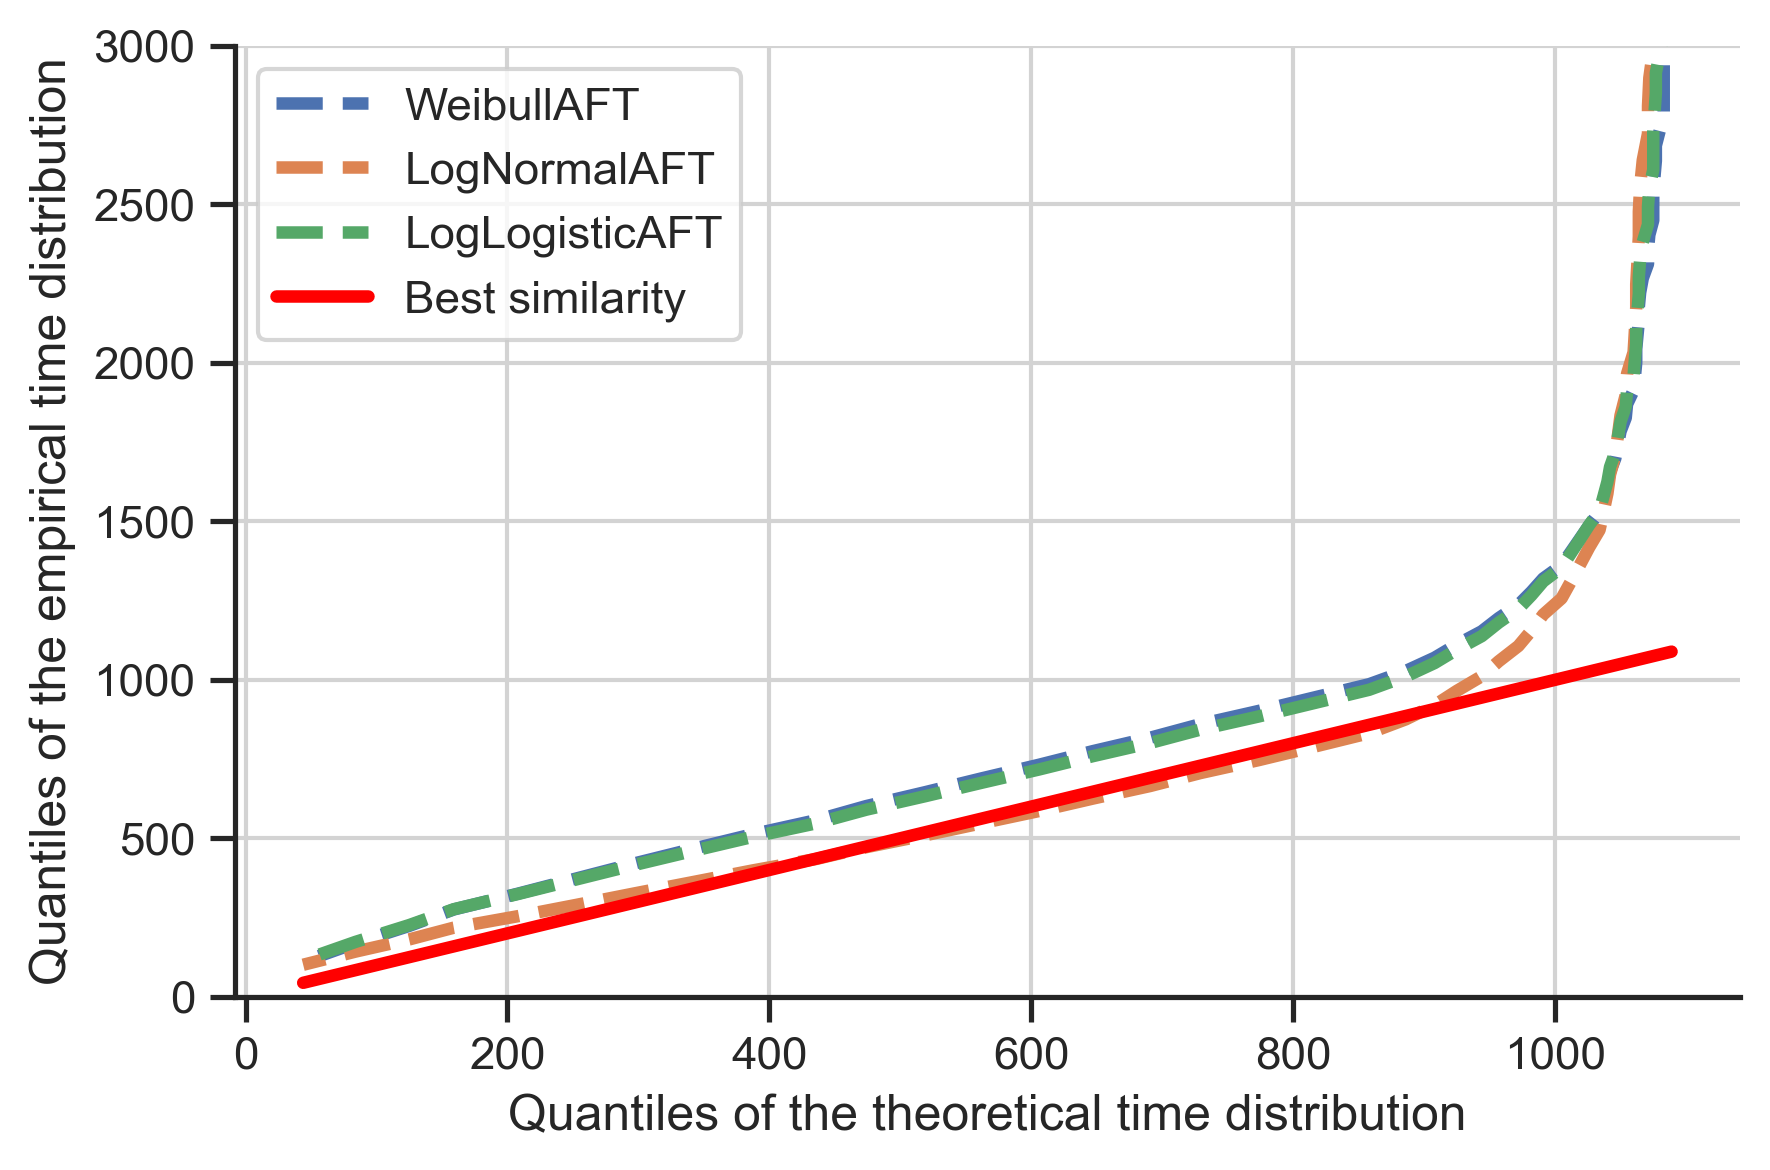

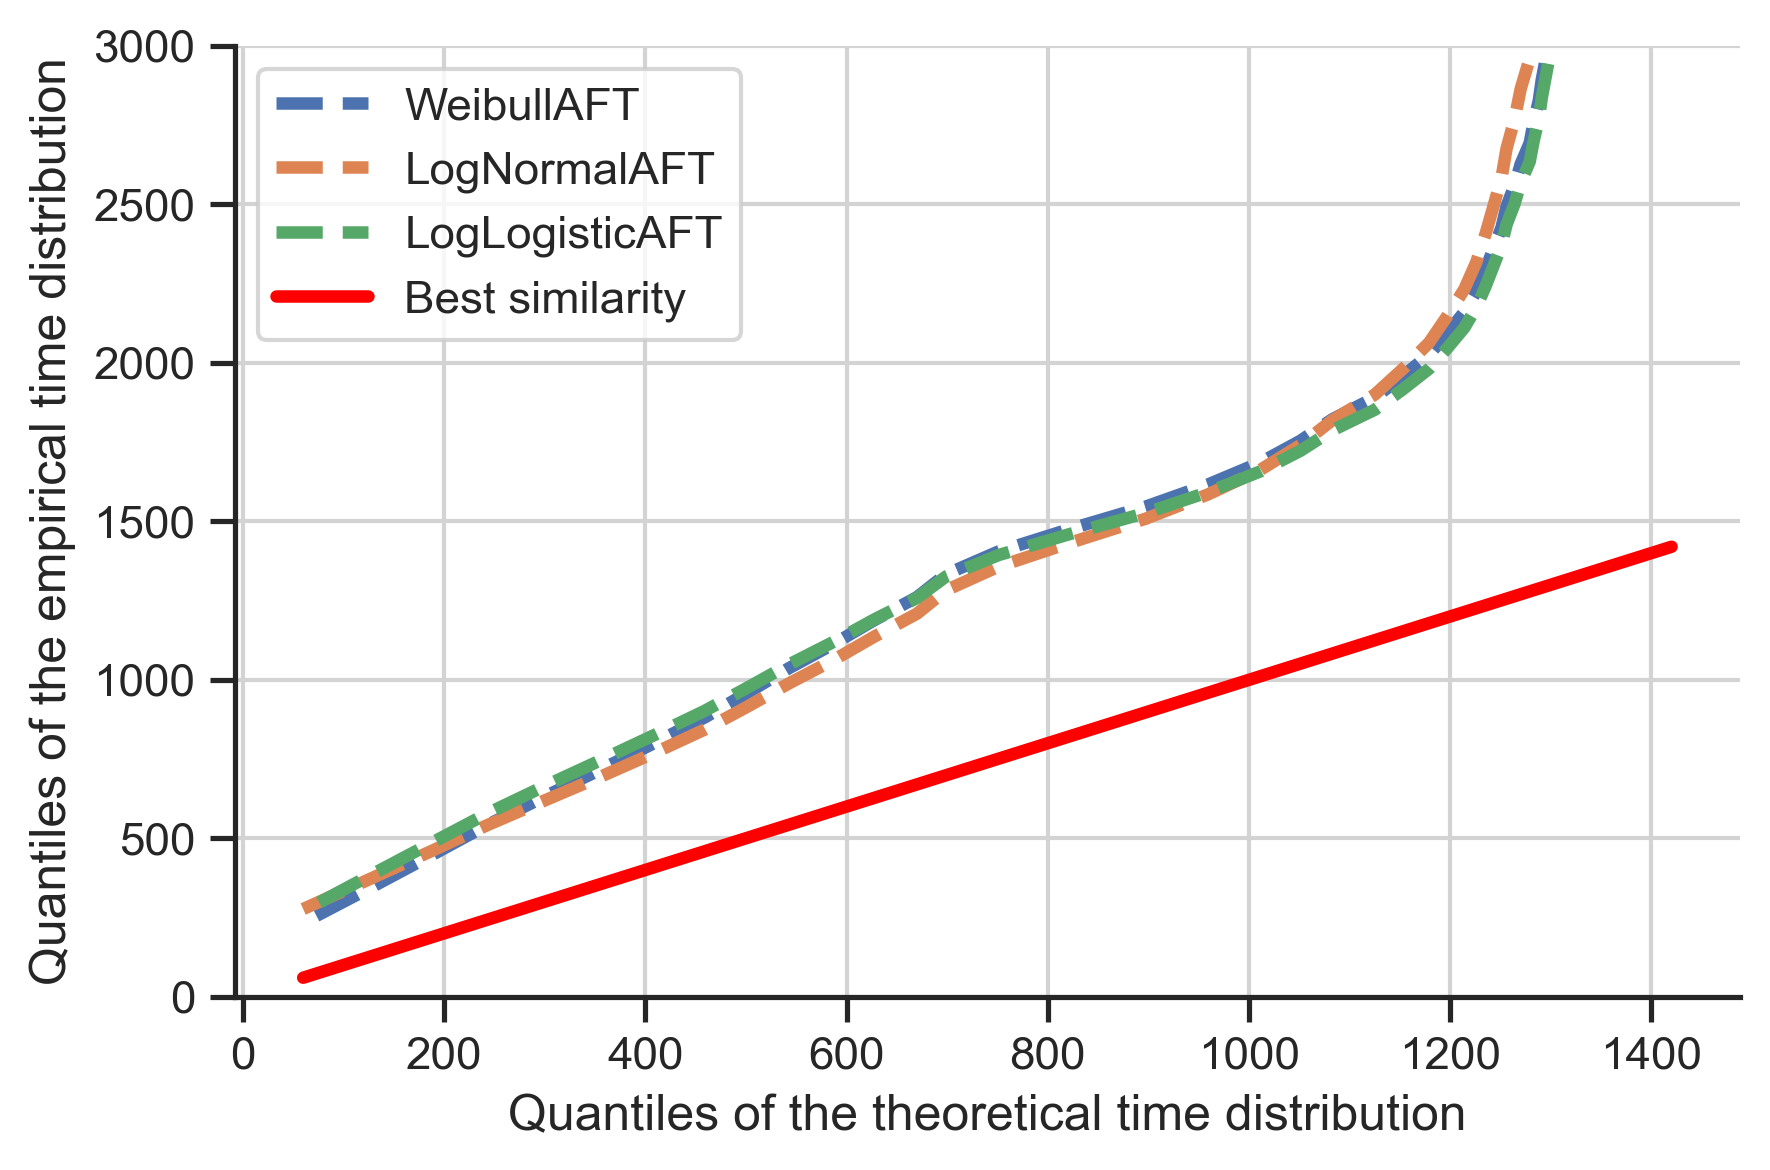

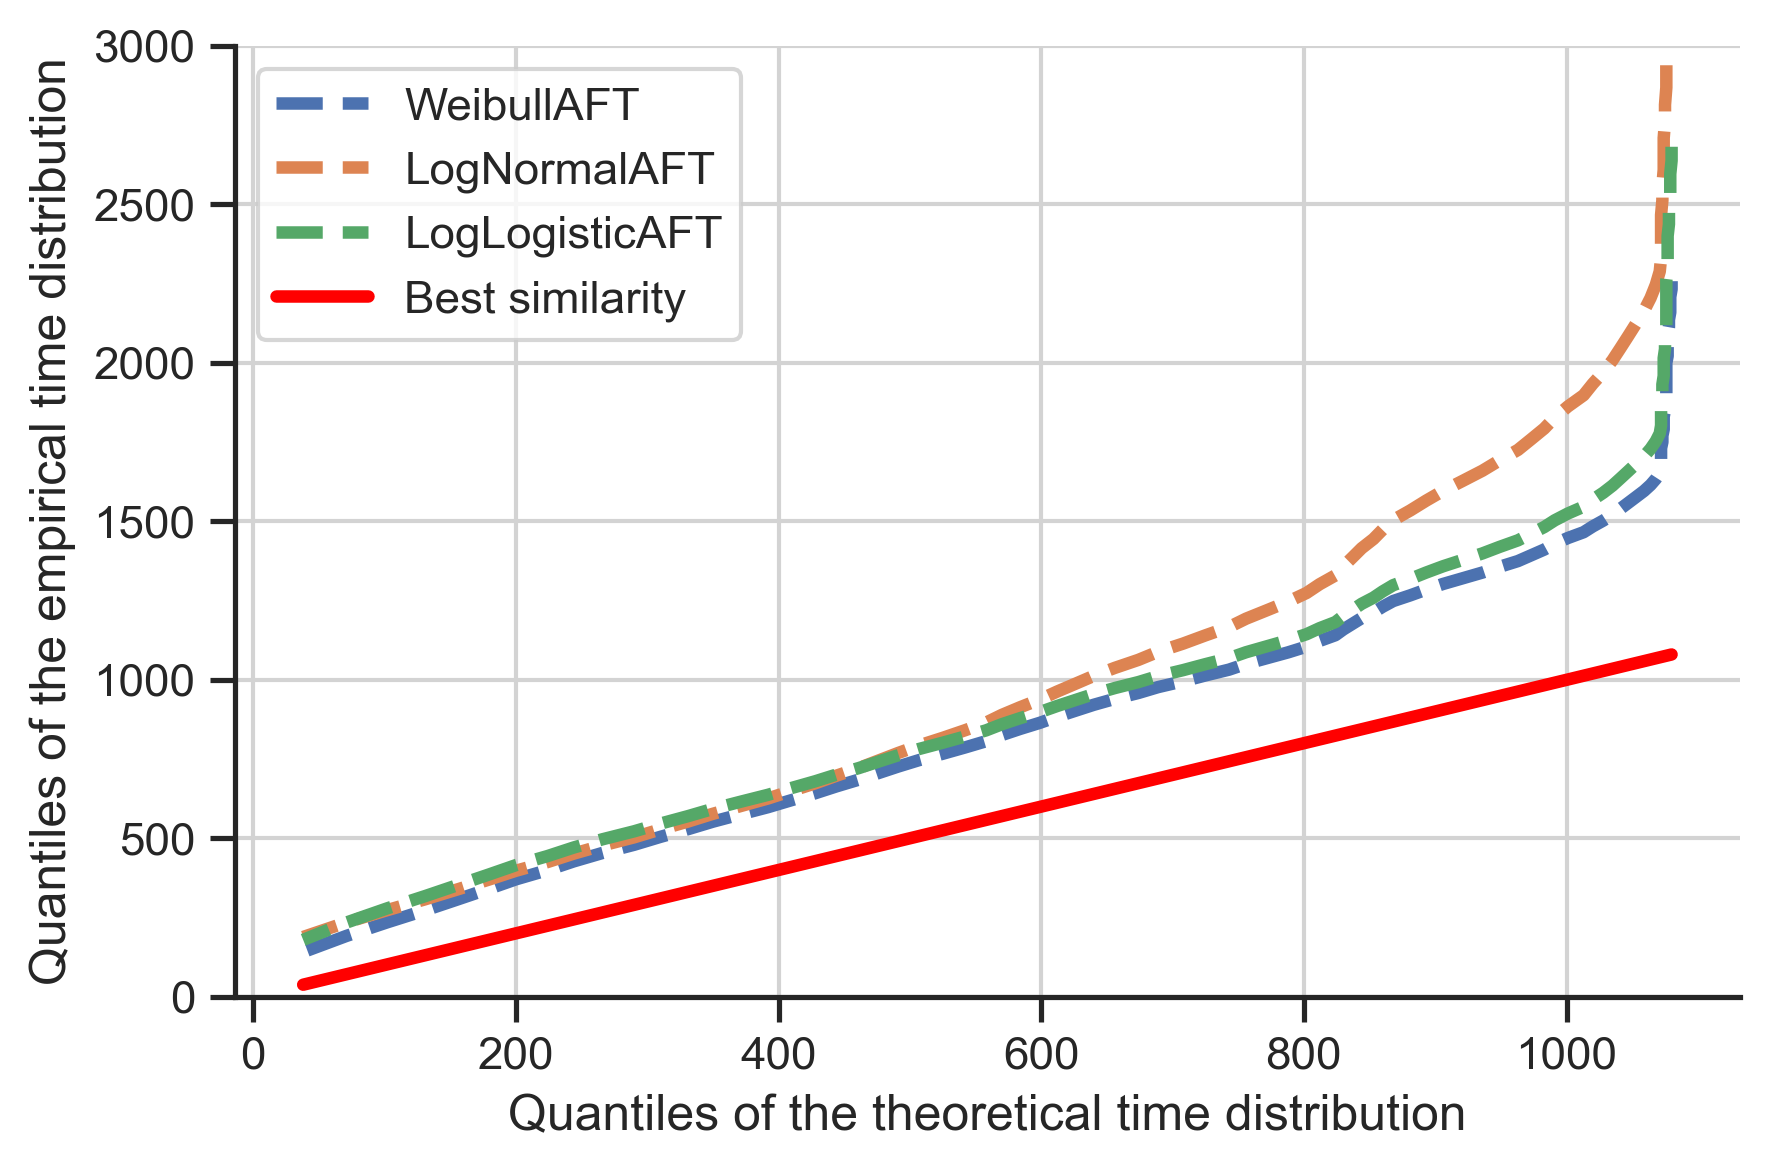

In [124]:
for loader in [ds.load_backblaze_2016_2018, ds.load_backblaze_2018_2021, ds.load_backblaze_2021_2023]:
    X, y, features, categ, _ = loader()
    df = X.fillna(0).copy()
    df["time"] = y["time"]
    df["event"] = y["cens"]
    check_assumption(df)

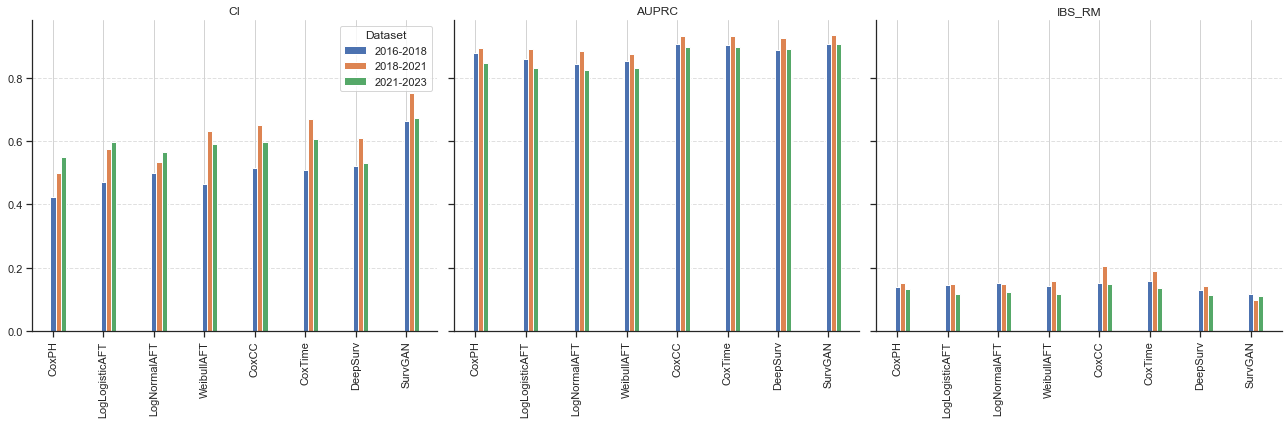

In [129]:
import pandas as pd
import matplotlib.pyplot as plt


# Чтение CSV в DataFrame
df = pd.read_csv("./exp.csv")

# Настройки графиков
metrics = ["CI", "AUPRC", "IBS_RM"]
datasets = ["2016-2018", "2018-2021", "2021-2023"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(metrics):
    plot_data = []
    for j, dataset in enumerate(datasets):
        col = f"{metric}_{dataset.replace('-', '_')}"
        temp_df = pd.DataFrame({
            "Method": df["METHOD"],
            "Value": df[col],
            "Dataset": dataset
        })
        plot_data.append(temp_df)
    plot_df = pd.concat(plot_data)

    # Столбчатая диаграмма
    for idx, dataset in enumerate(datasets):
        subset = plot_df[plot_df["Dataset"] == dataset]
        axes[i].bar(
            x=[x + idx*0.1 for x in range(len(subset))],
            height=subset["Value"],
            width=0.1,
            label=dataset if i == 0 else ""
        )
    axes[i].set_title(metric)
    axes[i].set_xticks(range(len(df["METHOD"])))
    axes[i].set_xticklabels(df["METHOD"], rotation=90)
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)
#     if metric == "IBS_RM":
#         ax.invert_yaxis()  # Для IBS меньше — лучше

axes[0].legend(title="Dataset")
plt.tight_layout()
plt.show()


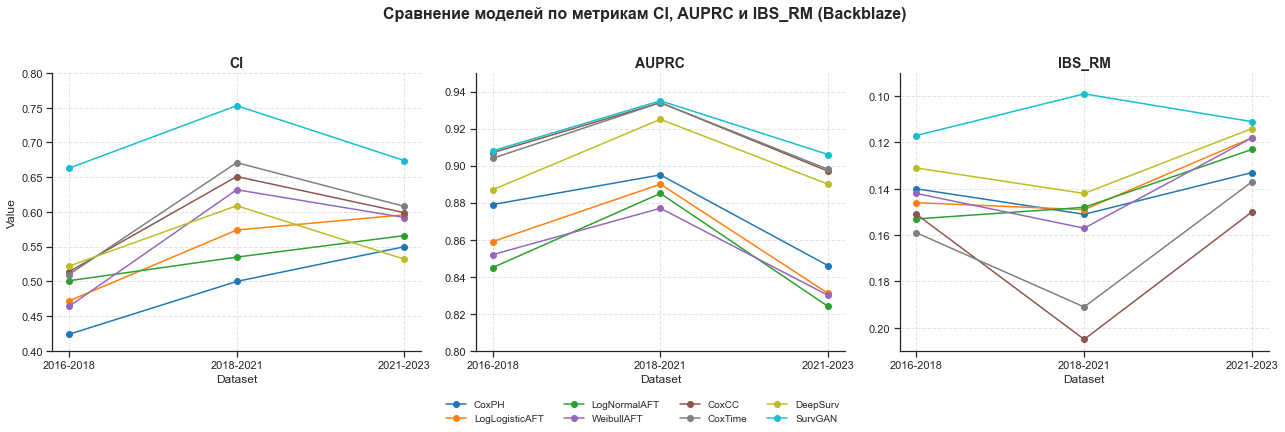

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

df = pd.read_csv("./exp.csv")

# Настройка единой цветовой схемы
colors = plt.cm.tab10(np.linspace(0, 1, len(df["METHOD"])))
model_colors = dict(zip(df["METHOD"], colors))

# Настройки фигуры
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

metrics = ["CI", "AUPRC", "IBS_RM"]
datasets = ["2016-2018", "2018-2021", "2021-2023"]

for i, metric in enumerate(metrics):
    ax = axes[i]

    for method in df["METHOD"]:
        values = [
            df.loc[df["METHOD"] == method, f"{metric}_2016_2018"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2018_2021"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2021_2023"].values[0]
        ]
        ax.plot(datasets, values, marker='o', label=method, color=model_colors[method], linewidth=1.5, markersize=6)

    ax.set_title(metric, fontsize=14, fontweight="bold")
    ax.set_xlabel("Dataset", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    if metric == "CI":
        ax.set_ylim(0.4, 0.8)
    elif metric == "AUPRC":
        ax.set_ylim(0.8, 0.95)
    else:
        ax.set_ylim(0.09, 0.21)
        ax.invert_yaxis()
    
    if metric == "CI":
        ax.set_ylabel("Value", fontsize=12)

# Единая легенда
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=10, frameon=False)

plt.suptitle("Сравнение моделей по метрикам CI, AUPRC и IBS_RM (Backblaze)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()


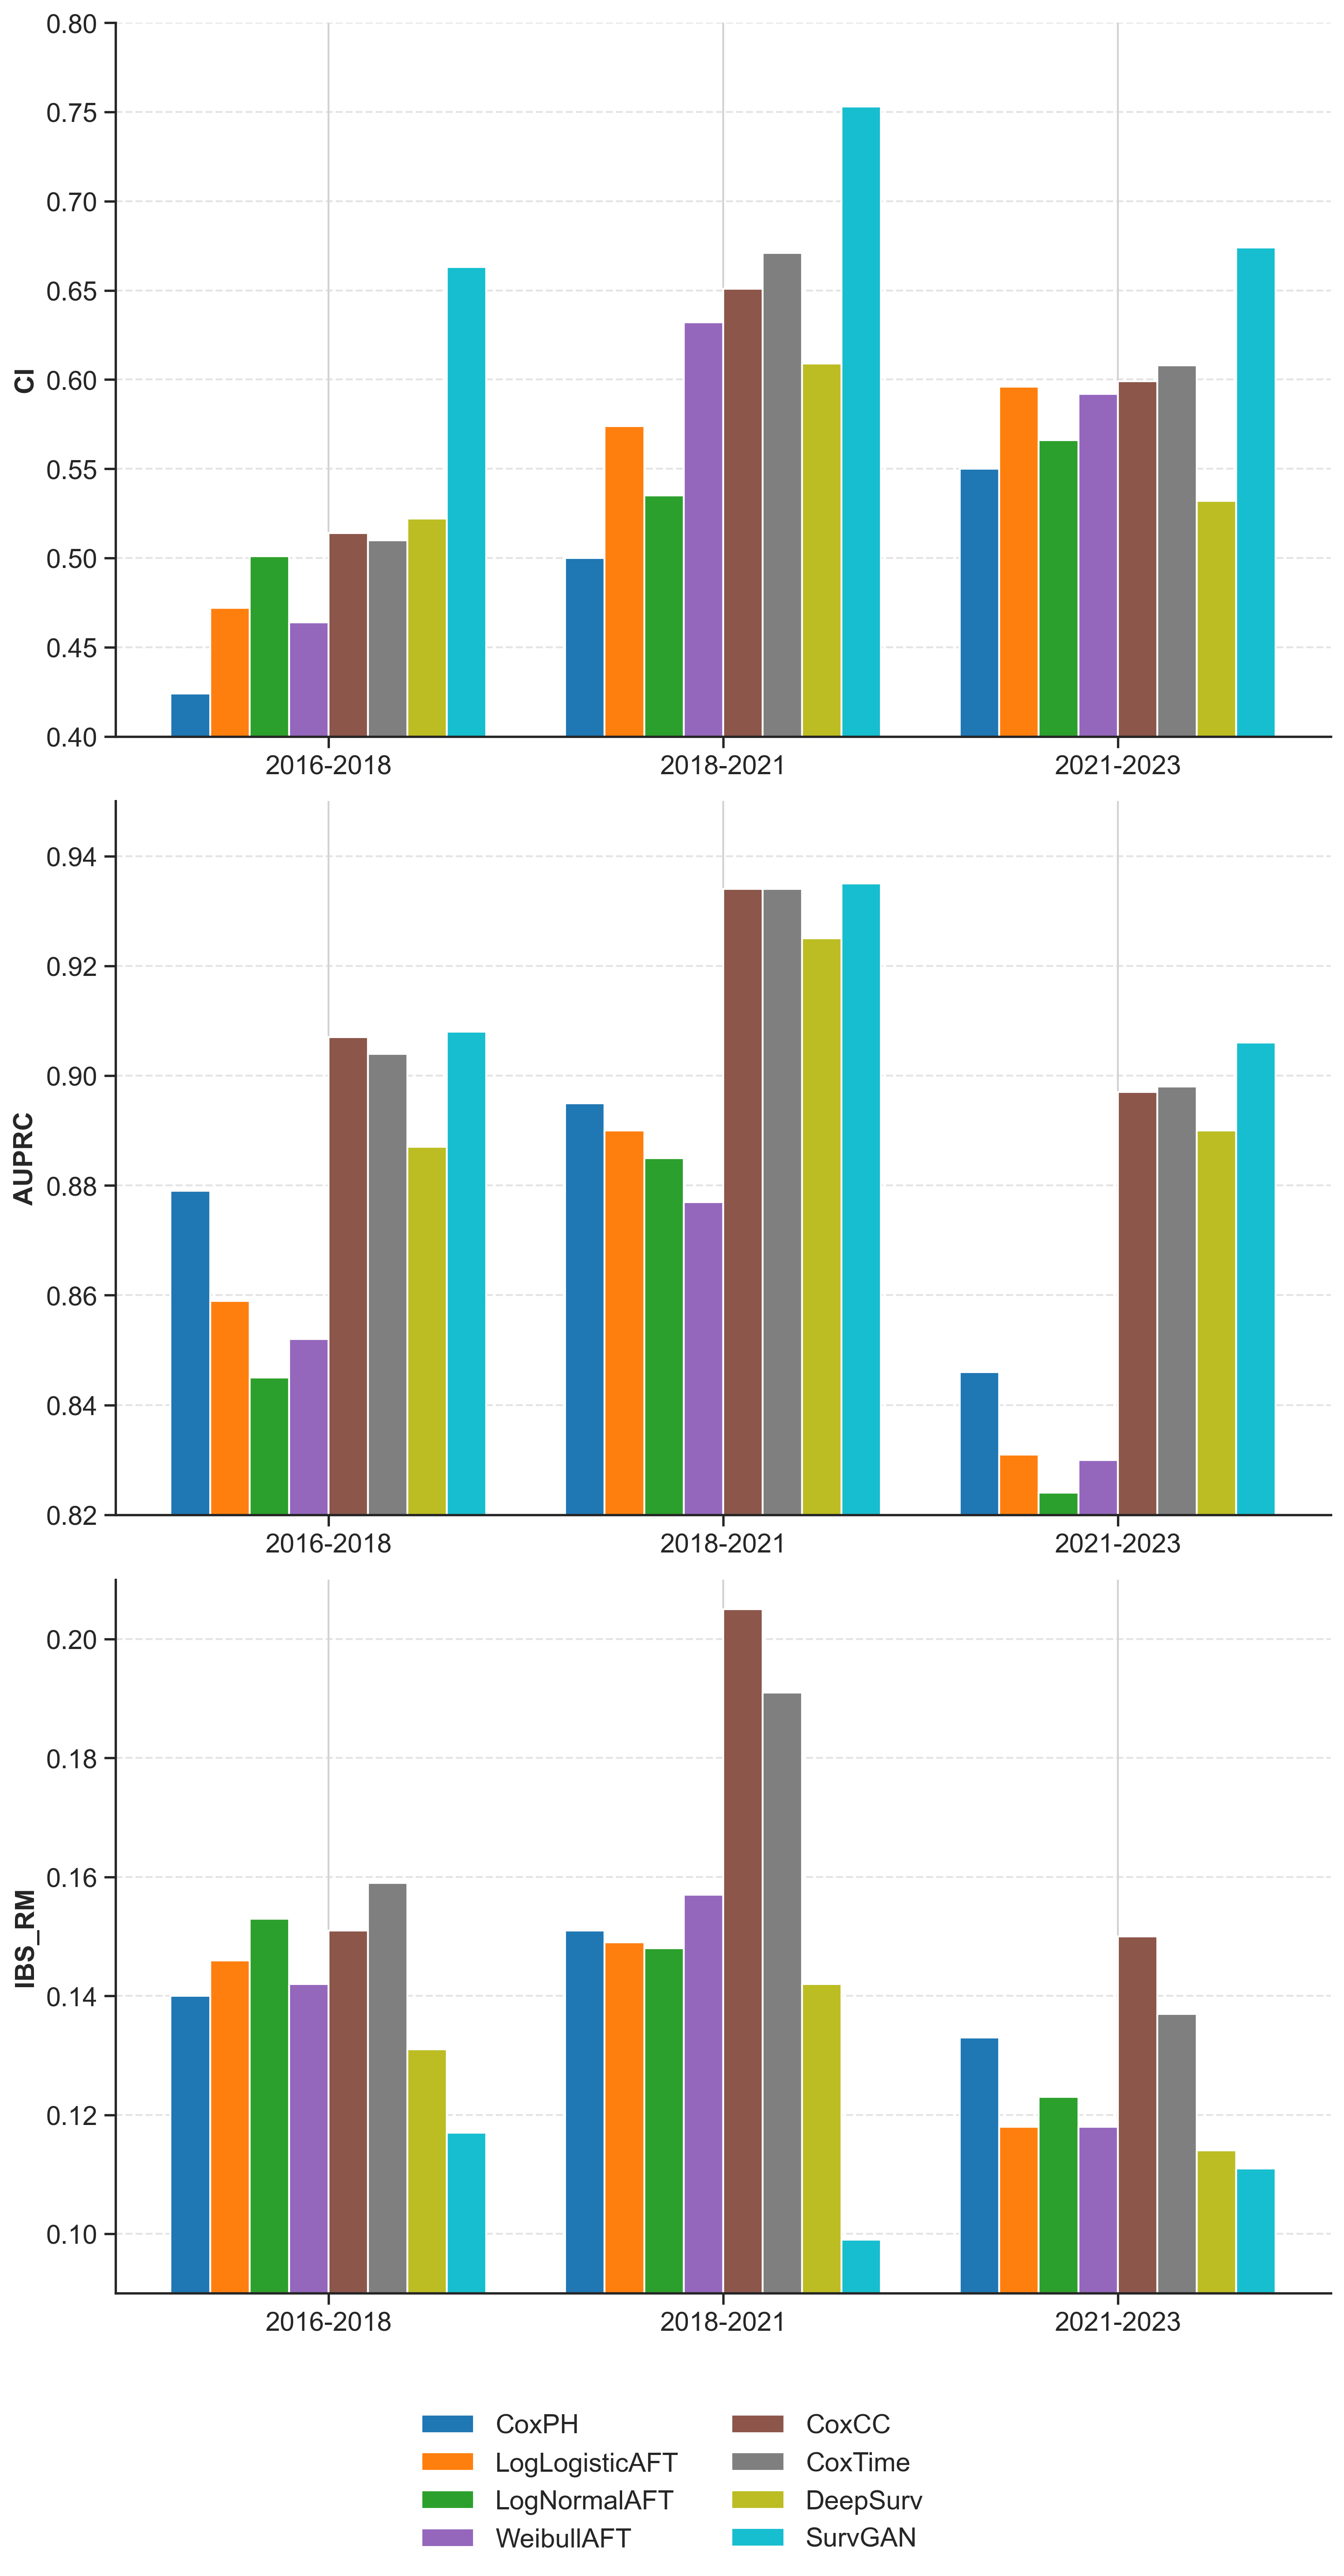

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

df = pd.read_csv("./exp.csv")

metrics = ["CI", "AUPRC", "IBS_RM"]
datasets = ["2016-2018", "2018-2021", "2021-2023"]

# Цвета для моделей
colors = plt.cm.tab10(np.linspace(0, 1, len(df["METHOD"])))
model_colors = dict(zip(df["METHOD"], colors))

fig, axes = plt.subplots(3, 1, figsize=(10, 20))

bar_width = 0.1
x = np.arange(len(datasets))  # позиции групп

for i, metric in enumerate(metrics):
    ax = axes[i]

    for j, method in enumerate(df["METHOD"]):
        values = [
            df.loc[df["METHOD"] == method, f"{metric}_2016_2018"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2018_2021"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2021_2023"].values[0]
        ]
        ax.bar(x + j * bar_width, values, width=bar_width,
               label=method if i == 0 else "",
               color=model_colors[method])
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     ax.set_title(metric, fontsize=14, fontweight="bold")
    ax.set_xticks(x + (len(df["METHOD"]) - 1) * bar_width / 2)
    ax.set_xticklabels(datasets, fontsize=14)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    if metric == "CI":
        ax.set_ylim(0.4, 0.8)
    elif metric == "AUPRC":
        ax.set_ylim(0.82, 0.95)
    else:
        ax.set_ylim(0.09, 0.21)
    ax.set_ylabel(metric, fontsize=14, fontweight="bold")

# axes[0].set_ylabel("Value", fontsize=12)
fig.legend(df["METHOD"], loc="lower center", ncol=2, fontsize=14, frameon=False)
# plt.suptitle("Сравнение моделей по метрикам CI, AUPRC и IBS_RM (Backblaze)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
fig.set_dpi(300)
plt.savefig("./barplot.png")

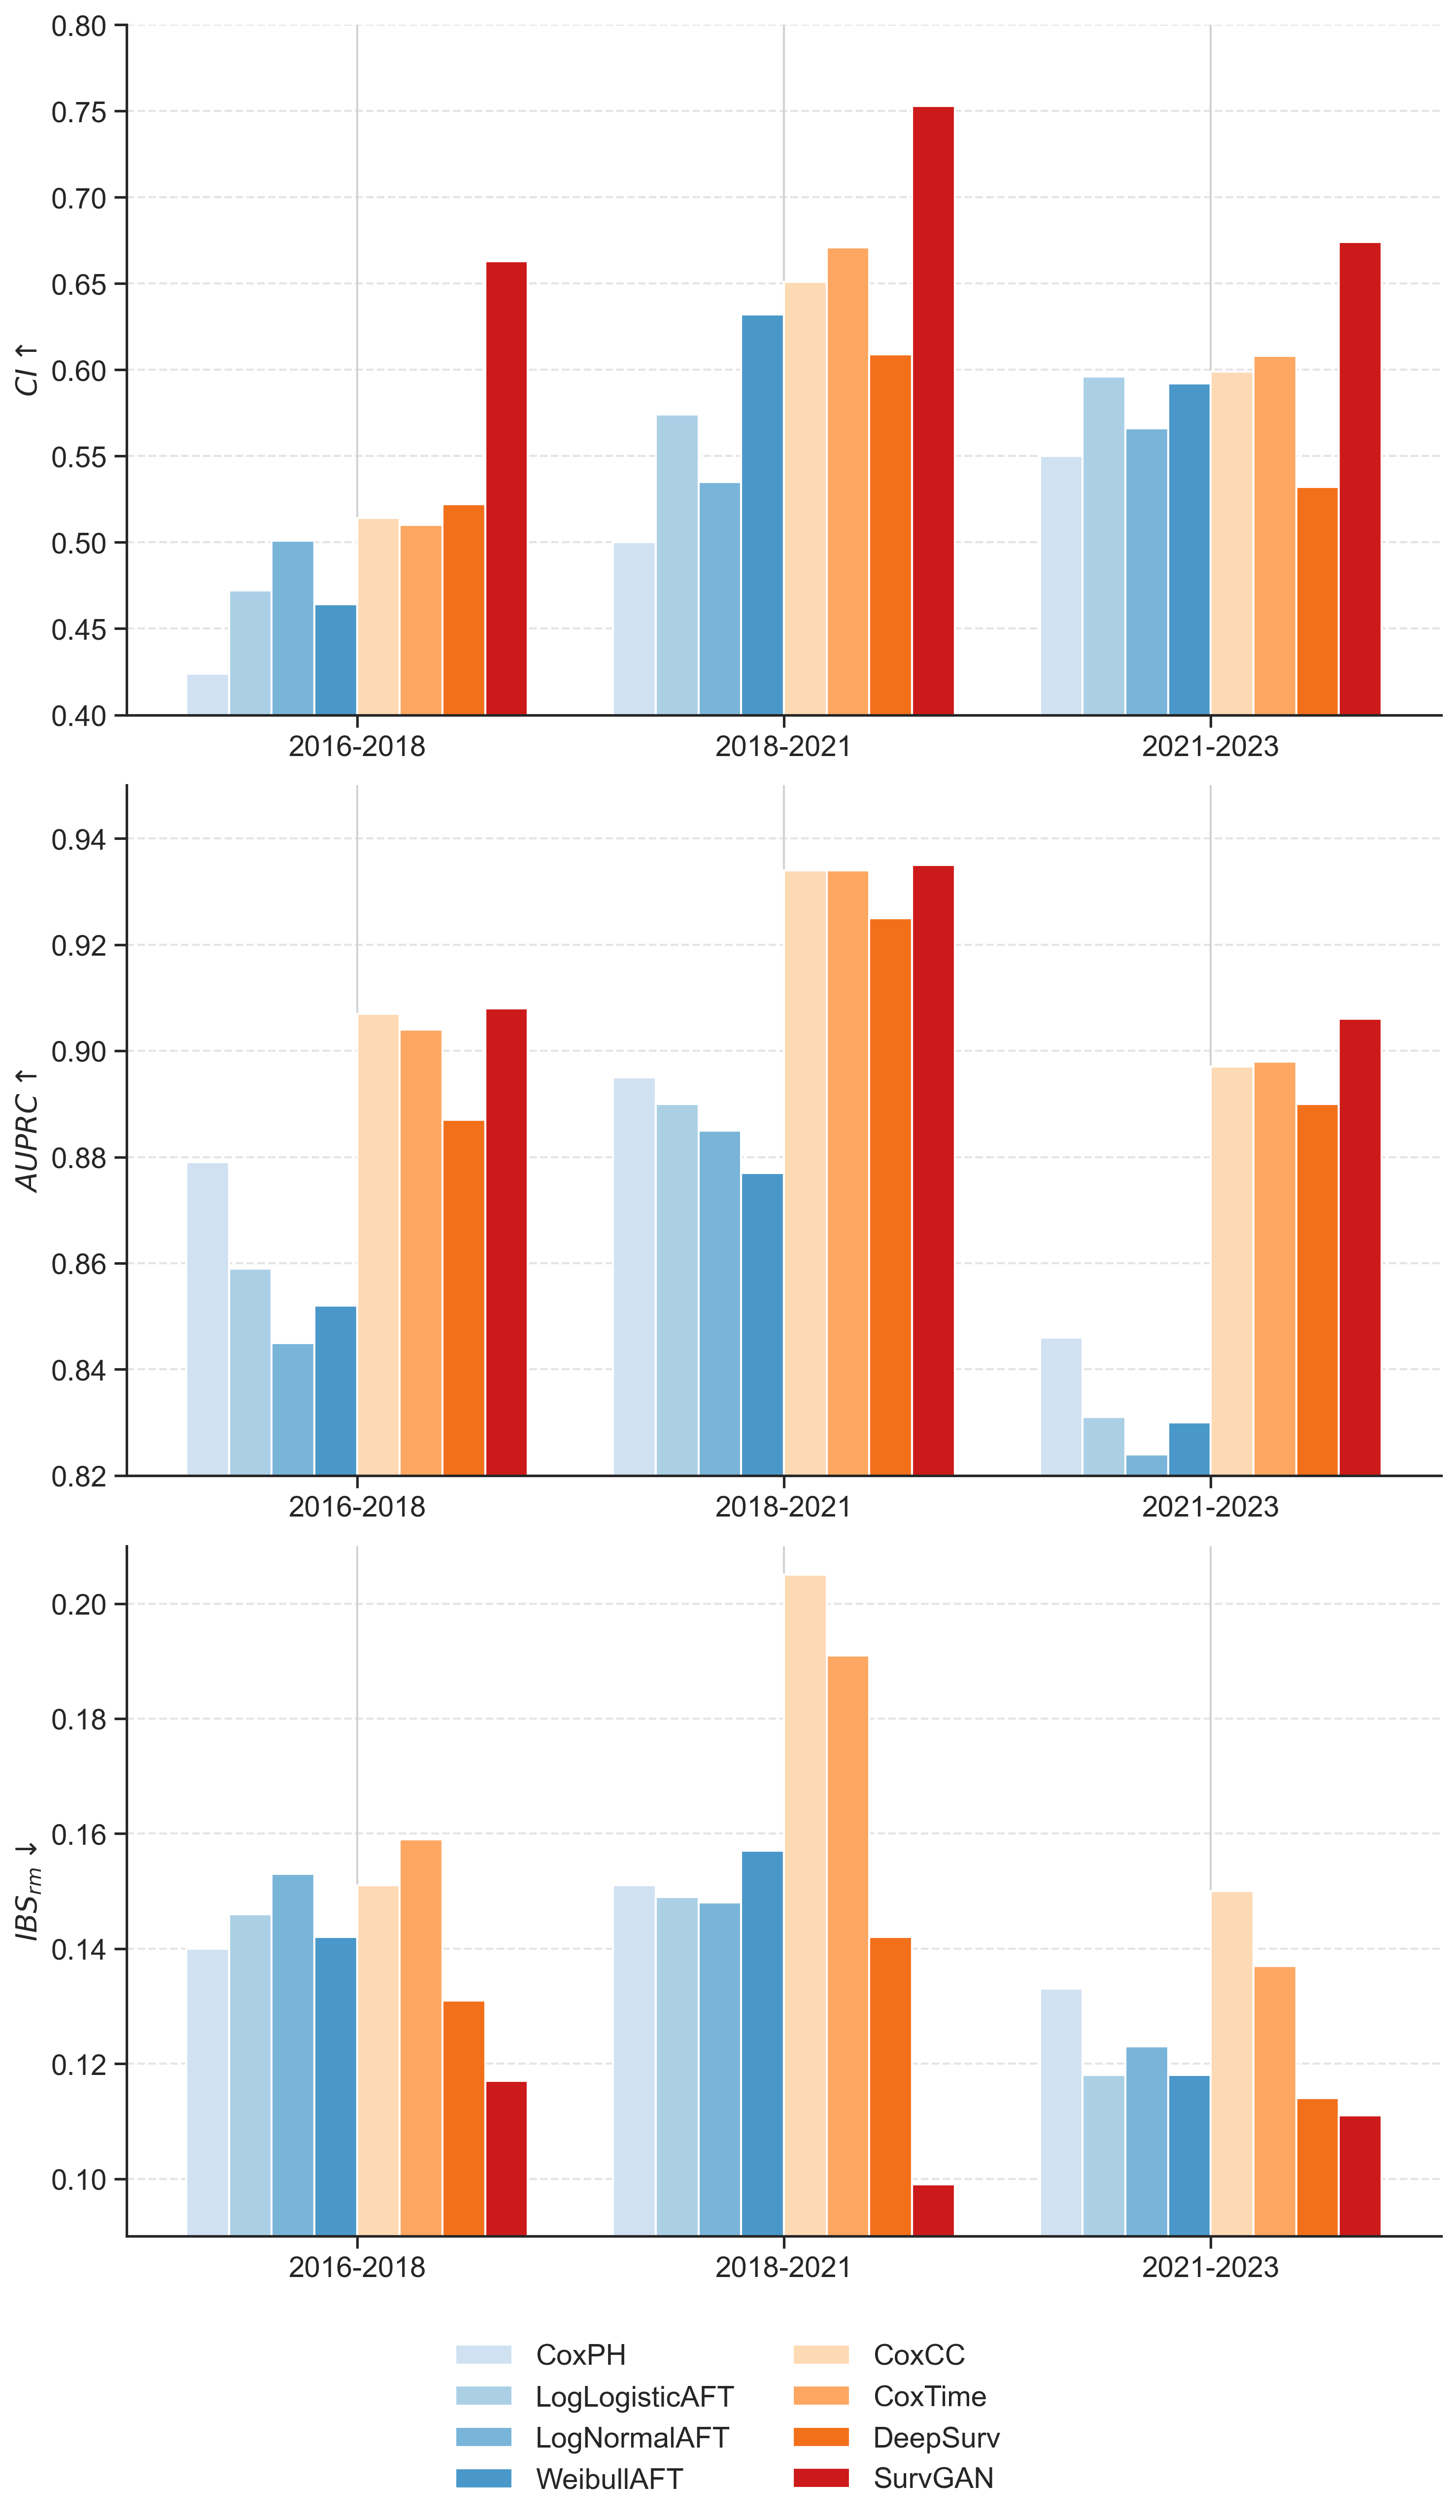

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

df = pd.read_csv("./exp.csv")

metrics = ["CI", "AUPRC", "IBS_RM"]
datasets = ["2016-2018", "2018-2021", "2021-2023"]

stat_models = ["CoxPH", "LogLogisticAFT", "LogNormalAFT", "WeibullAFT"]
nn_models = ["CoxCC", "CoxTime", "DeepSurv"]
proposed_model = ["SurvGAN"]

color_map = {}
# Синие оттенки для статистических
blue_palette = plt.cm.Blues(np.linspace(0.2, 0.6, len(stat_models)))
for model, color in zip(stat_models, blue_palette):
    color_map[model] = color
# Оранжевые оттенки для нейросетевых
orange_palette = plt.cm.Oranges(np.linspace(0.2, 0.6, len(nn_models)))
for model, color in zip(nn_models, orange_palette):
    color_map[model] = color
# Красный для предложенной модели
color_map["SurvGAN"] = (0.8, 0.1, 0.1)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

bar_width = 0.1
x = np.arange(len(datasets))  # позиции групп

for i, metric in enumerate(metrics):
    ax = axes[i]

    for j, method in enumerate(df["METHOD"]):
        values = [
            df.loc[df["METHOD"] == method, f"{metric}_2016_2018"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2018_2021"].values[0],
            df.loc[df["METHOD"] == method, f"{metric}_2021_2023"].values[0]
        ]
        ax.bar(x + j * bar_width, values, width=bar_width,
               label=method if i == 0 else "",
               color=color_map[method])

    ax.tick_params(axis='both', which='major', labelsize=14)
#     ax.set_title(metric, fontsize=14, fontweight="bold")
    ax.set_xticks(x + (len(df["METHOD"]) - 1) * bar_width / 2)
    ax.set_xticklabels(datasets, fontsize=14)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    if metric == "CI":
        ax.set_ylim(0.4, 0.8)
        ax.set_ylabel(r"$CI \uparrow$", fontsize=14, fontweight="bold")
    elif metric == "AUPRC":
        ax.set_ylim(0.82, 0.95)
        ax.set_ylabel(r"$AUPRC \uparrow$", fontsize=14, fontweight="bold")
    else:
        ax.set_ylim(0.09, 0.21)
        ax.set_ylabel(r"$IBS_{rm} \downarrow$", fontsize=14, fontweight="bold")

fig.legend(df["METHOD"], loc="lower center", ncol=2, fontsize=14, frameon=False)
# plt.suptitle("Сравнение моделей по метрикам CI, AUPRC и IBS_RM (Backblaze)", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
fig.set_dpi(300)
plt.savefig("./barplot.png")